Function:  x**3 + x**2 - 3*x - 3
Root:  1.732051
Iterations Table:
          Xl        Xu        Xr    F(Xl)    F(Xu)    F(Xr)
0   1.000000  2.000000  1.500000 -4.00000  3.00000 -1.87500
1   1.500000  2.000000  1.750000 -1.87500  3.00000  0.17188
2   1.500000  1.750000  1.625000 -1.87500  0.17188 -0.94336
3   1.625000  1.750000  1.687500 -0.94336  0.17188 -0.40942
4   1.687500  1.750000  1.718750 -0.40942  0.17188 -0.12479
5   1.718750  1.750000  1.734375 -0.12479  0.17188  0.02203
6   1.718750  1.734375  1.726562 -0.12479  0.02203 -0.05176
7   1.726562  1.734375  1.730468 -0.05176  0.02203 -0.01496
8   1.730468  1.734375  1.732422 -0.01496  0.02203  0.00351
9   1.730468  1.732422  1.731445 -0.01496  0.00351 -0.00573
10  1.731445  1.732422  1.731933 -0.00573  0.00351 -0.00111
11  1.731933  1.732422  1.732177 -0.00111  0.00351  0.00119
12  1.731933  1.732177  1.732055 -0.00111  0.00119  0.00004
13  1.731933  1.732055  1.731994 -0.00111  0.00004 -0.00054
14  1.731994  1.732055  1.732025 

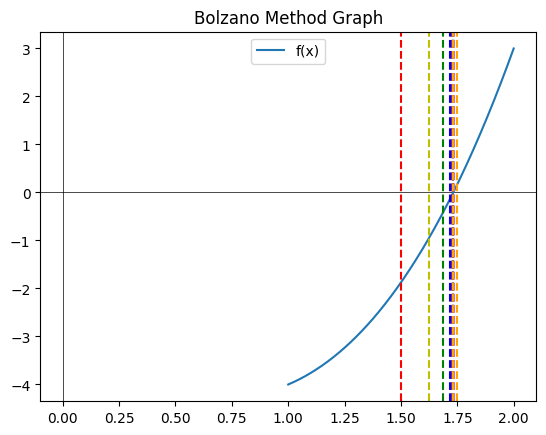

In [72]:
# Kelompok 9:
# Malvin Leonardo Hartanto (5025221033)
# Mohammad Hanif Furqan Aufa Putra (5025221161)
# Muhammad Alif Satriadhi (5025221188)

# Berikut link Google Colab file ini:
# https://colab.research.google.com/drive/1nq808szNvoY804aUYjxpcILp0ipVfHnK?usp=sharing

# Bolzano untuk fungsi polinomial dan eksponensial.
# Contoh penggunaan:
# x**3 + x**2 - 3*x - 3 artinya x^3 + x^2 - 3x - 3
# np.exp(-x) - x artinya e^(-x) - x
# 2**x - 3 artinya 2^x -3

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class BolzanoMethod:
    def __init__(self, function_str="x", lower_bound=-1000, upper_bound=1000, precision=4, max_iterations=2000):
        self.function_str = function_str
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.initial_lower_bound = lower_bound
        self.initial_upper_bound = upper_bound
        self.precision = precision
        self.max_iterations = max_iterations
        self.root = 0.0
        self.iterations = []
        self.dataframe = pd.DataFrame()
        self._calculate_midpoint()

    def _calculate_midpoint(self):
        self.midpoint = round((self.upper_bound + self.lower_bound) / 2.0, self.precision)

    def _evaluate_function(self, x):
        return eval(self.function_str)

    def _round_values(self):
        self.upper_bound = round(self.upper_bound, self.precision)
        self.lower_bound = round(self.lower_bound, self.precision)
        self.midpoint = round(self.midpoint, self.precision)

    def find_root(self):
        iteration = 0
        while iteration < self.max_iterations:
            iteration += 1
            self._round_values()
            f_upper = round(self._evaluate_function(self.upper_bound), self.precision - 1)
            f_lower = round(self._evaluate_function(self.lower_bound), self.precision - 1)
            f_mid = round(self._evaluate_function(self.midpoint), self.precision - 1)

            self.iterations.append([self.lower_bound, self.upper_bound, self.midpoint, f_lower, f_upper, f_mid])

            if abs(f_lower) <= 10 ** (-self.precision + 1):
                self.root = self.lower_bound
                break
            elif abs(f_upper) <= 10 ** (-self.precision + 1):
                self.root = self.upper_bound
                break
            elif abs(f_mid) <= 10 ** (-self.precision + 1):
                self.root = self.midpoint
                break

            if f_lower * f_mid < 0:
                self.upper_bound = self.midpoint
            else:
                self.lower_bound = self.midpoint

            self._calculate_midpoint()

        else:
            print("No root found within the given interval and iteration limit.")

    def display_iterations(self):
        self.dataframe = pd.DataFrame(self.iterations, columns=["Xl", "Xu", "Xr", "F(Xl)", "F(Xu)", "F(Xr)"])
        print(self.dataframe)

    def plot_graph(self):
        x = np.linspace(self.initial_lower_bound, self.initial_upper_bound, 400)
        y = [self._evaluate_function(xi) for xi in x]
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.plot(x, y, label="f(x)")
        colors = ['r', 'orange', 'y', 'g', 'b', 'violet', 'purple', 'c']
        for i, xr in enumerate(self.dataframe["Xr"]):
            plt.axvline(x=xr, color=colors[i % len(colors)], linestyle='--')
        plt.title("Bolzano Method Graph")
        plt.legend()
        plt.show()

if __name__ == "__main__":
    bolzano = BolzanoMethod(
        # Masukkan fungsi Anda pada function_str di bawah ini.
        # Sesuaikan parameter lainnya sesuai kebutuhan.
        function_str="x**3 + x**2 - 3*x - 3",
        lower_bound=1,
        upper_bound=2,
        precision=6,
        max_iterations=2000
    )
    print("Function: ", bolzano.function_str)
    bolzano.find_root()
    print("Root: ", bolzano.root)
    print("Iterations Table:")
    bolzano.display_iterations()
    bolzano.plot_graph()